In [1]:
import sys
import aa_py
%matplotlib inline
%load_ext autoreload
%autoreload 2
from orbit import *
import json

In [41]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties, run_progenitor_orbit
s, pmmag, ca = 2., 0.25, 1.0
simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                 Nparticles=4e5)

eq = crater2_eq()
solar_reflex = crater2_solarreflex()
pm = np.array([pmmag,0.])+solar_reflex
Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

# info = json.load(open('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_25_ca_10.simlog'))

rs_nfw=simprops['Rscale']
c = simprops['c']
Delta=simprops['Delta']
from nbody_tools import Mvir_NFW, Vmax_NFW

print Mvir_NFW(rs_nfw,c,Delta=Delta)/3.7e9
print Vmax_NFW(rs_nfw,c,Delta=Delta)

R,T = integrate_orbits_backwards(Eq)

print pericentre(R),apocentre(R),count_pericentres(R)
print tidal_radius(pericentre(R),rs_nfw,c=c,Delta=Delta)
print tidal_radius(apocentre(R),rs_nfw,c=c,Delta=Delta)
print mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)
print penarrubia_tracks(mass_loss(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta))[0]
print period(R,T)

data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.)))
data_flat = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.)))

IntTime not scaled to correct units! (Gyr). Also dont need to scale results in times for nbody_tools
Scale radius = 0.725
Softening = 0.0515715008184
[  65.19547321  119.69600718   51.66028503  -82.62837589    9.90109634
   67.2656748 ]
Tidal radius =  10.3447574722
Time unit:  0.176099900266
Mass fraction inside r_s =  0.0749852300389
400000.0
Velocity dispersion =  12.6598104782
0.356132538035
20.0979727798
51.9994761972 145.84522505 4
3.53445624454
10.3508345471
0.431056996936
3.53445624454
0.431056996936
0.656549310361
2.59460155745


In [43]:
run_progenitor_orbit(simprops)

IntTime not scaled to correct units! (Gyr). Also dont need to scale results in times for nbody_tools

/bin/csh -c 'source /home/jls/.cshrc && source $NEMO/nemo.rc && setenv FALCON $NEMO/usr/dehnen/falcON.P && source $FALCON/falcON_restart && a2s in=tmp out=/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_25_ca_10_orbit_in.snp N=1 read=mxv;'


/bin/csh -c 'source /home/jls/.cshrc && source $NEMO/nemo.rc && setenv FALCON $NEMO/usr/dehnen/falcON.P && source $FALCON/falcON_restart && gyrfalcON in=/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_25_ca_10_orbit_in.snp out=/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_25_ca_10_orbit_out.snp tstop=10.8441039453 eps=0.001 Nlev=6 kmax=7 fac=0.01 fph=0.01 fea=0.01 fpa=0.01 step=0 accname=GalPot accfile=/home/jls/work/code/Torus/pot/PJM16_best.Tpot Grav=1 debug=0 logfile=/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_25_ca_10_orbit.log ;'


/bi

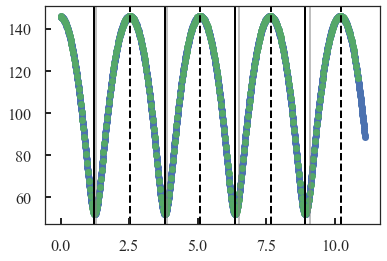

In [70]:
gg = np.genfromtxt('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_2_PM_25_ca_10_orbit.dat')

plt.plot(np.linspace(0.,1.,len(gg.T[1]))*T[-1]/0.977775,np.sqrt(gg.T[1]**2+gg.T[2]**2+gg.T[3]**2),'.')
plt.plot(T,np.sqrt(R.T[0]**2+R.T[1]**2+R.T[2]**2)[::-1],'.')
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];

3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454


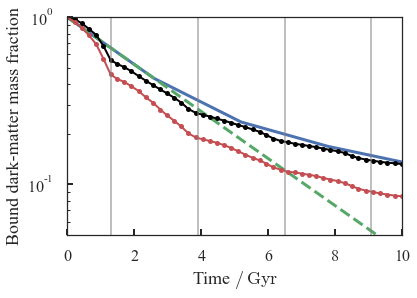

In [71]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
                                   Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(5e-2,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm']/data['mass_dm'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm']/data_flat['mass_dm'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454


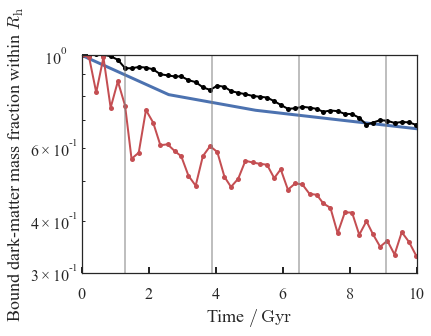

In [30]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(0.3,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core']/data['mass_dm_core'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core']/data_flat['mass_dm_core'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454
3.53445624454
5.05241295409
5.05241295409
5.05241295409
5.05241295409
5.05241295409
5.05241295409
3.53445624454


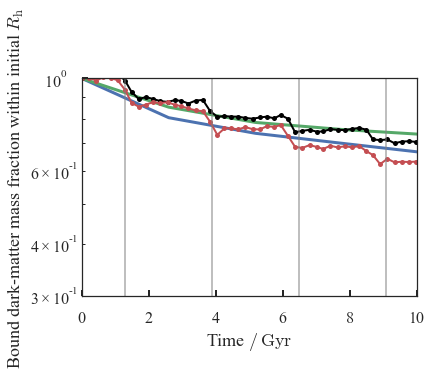

In [73]:
Red = sns.color_palette()[2]
round_kwargs = {'ls':'solid','marker':'o','color':'k','ms':5}
flat_kwargs = {'ls':'solid','marker':'o','color':Red,'ms':5}
nn=np.arange(7)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R),apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
plt.plot(nn*period(R,T),[mass_loss_hayashi(pericentre(R)*1.4,apocentre(R),NN,rs_nfw,
                                           c=c,Delta=Delta,rlim=0.03*rs_nfw,rtotal=simprops['rs']) 
             for NN in nn],lw=3)
# plt.plot(nn*period(R,T),[mass_loss(pericentre(R),apocentre(R),NN,rs_nfw,c=c,
#                                    Delta=Delta) for NN in nn],ls='dashed',lw=3)
plt.ylim(0.3,1.)
plt.semilogy()
mbnd = mass_loss_hayashi(pericentre(R),apocentre(R),count_pericentres(R),
                         rs_nfw,c=c,Delta=Delta,rlim=0.03*rs_nfw)
plt.plot(data['times'],data['mass_dm_core_init']/data['mass_dm_core_init'][0],**round_kwargs);plt.semilogy()
plt.plot(data_flat['times'],data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0],**flat_kwargs);plt.semilogy()
plt.xlim(0.,10.)
[plt.axvline((P+.5)*period(R,T),color='gray',alpha=0.5) for P in range(count_pericentres(R))]
plt.ylabel(r'Bound dark-matter mass fraction within initial $R_\mathrm{h}$')
plt.xlabel(r'Time $/\,\mathrm{Gyr}$')

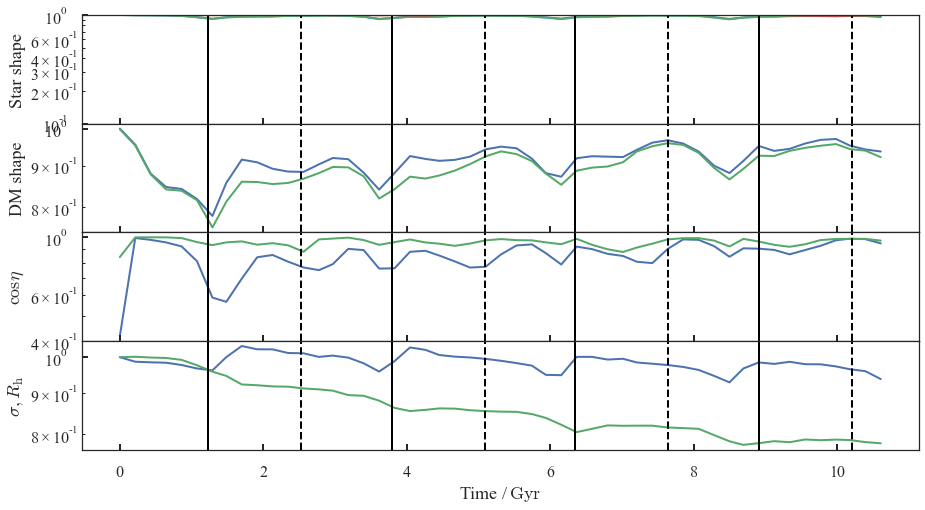

In [66]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data['times'],data['ba_st']);plt.semilogy()
plt.plot(data['times'],data['ca_st']);plt.semilogy()
plt.plot(data['times'],1.-data['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.1,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data['times'],data['ba_dm']);plt.semilogy()
plt.plot(data['times'],data['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data['times'],data['align_dm']);plt.semilogy()
plt.plot(data['times'],data['align_st']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\cos\eta$')
plt.sca(a[3])
plt.plot(data['times'],data['r_half']/data['r_half'][0]);plt.semilogy()
plt.plot(data['times'],data['sig_maj']/data['sig_maj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')

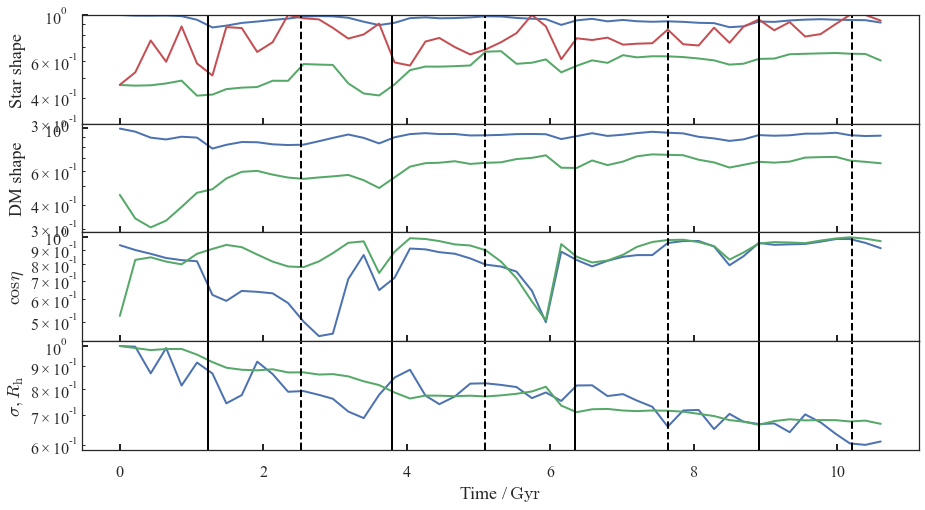

In [72]:
f,a=plt.subplots(4,1,figsize=[15.,8.])
plt.subplots_adjust(hspace=0.)
plt.sca(a[0])
plt.plot(data_flat['times'],data_flat['ba_st']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_st']);plt.semilogy()
plt.plot(data_flat['times'],1.-data_flat['eps']);plt.semilogy()
plt.ylabel('Star shape')
plt.ylim(0.3,1.)
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[1])
plt.plot(data_flat['times'],data_flat['ba_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['ca_dm']);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel('DM shape')
plt.sca(a[2])
plt.plot(data_flat['times'],data_flat['align_dm']);plt.semilogy()
plt.plot(data_flat['times'],data_flat['align_st']);plt.semilogy()
plt.ylabel(r'$\cos\eta$')
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.sca(a[3])
plt.plot(data_flat['times'],data_flat['r_half']/data_flat['r_half'][0]);plt.semilogy()
plt.plot(data_flat['times'],data_flat['sig_maj']/data_flat['sig_maj'][0]);plt.semilogy()
[plt.axvline(v,color='k') for v in peri_times(R,T)]
[plt.axvline(v,color='k',ls='dashed') for v in apo_times(R,T)];
plt.ylabel(r'$\sigma,R_\mathrm{h}$')
plt.xlabel(r'Time /$\,\mathrm{Gyr}$')

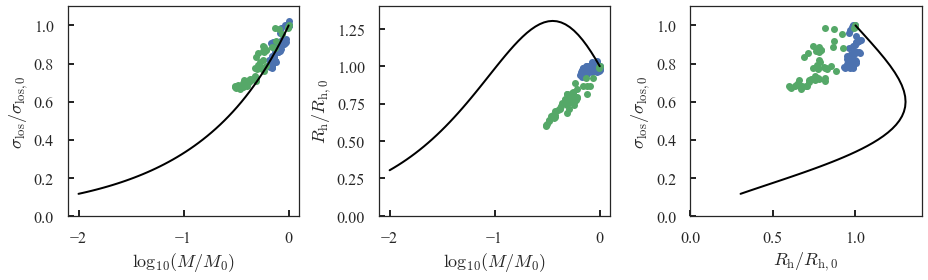

In [74]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['sig_proj']/data['sig_proj'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['r_half']/data['r_half'][0],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['r_half']/data_flat['r_half'][0],'.')
xx = np.logspace(-2.,0.)
plt.ylim(0.,1.4)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half']/data['r_half'][0],data['sig_maj']/data['sig_maj'][0],'.')
plt.plot(data_flat['r_half']/data_flat['r_half'][0],data_flat['sig_maj']/data_flat['sig_maj'][0],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
plt.xlim(0.,1.4)
plt.ylim(0.,1.1)
plt.tight_layout()

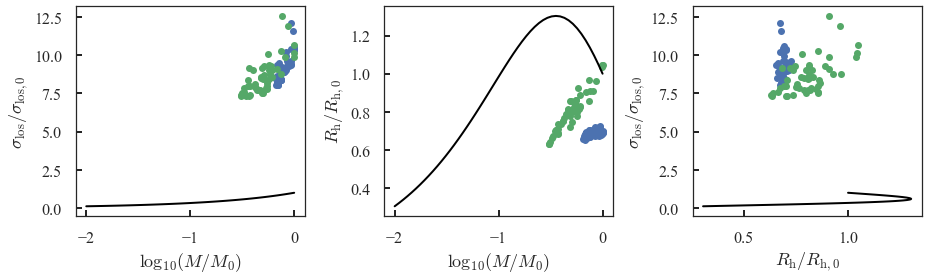

In [69]:
f,a=plt.subplots(1,3,figsize=[13.,4.])
plt.sca(a[0])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['sig_proj'],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['sig_proj'],'.')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
xx = np.logspace(-2.,0.)
# plt.ylim(0.,1.1)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[0],color='k')
plt.sca(a[1])
plt.plot(np.log10(data['mass_dm_core']/data['mass_dm_core'][0]),data['r_half'],'.')
plt.plot(np.log10(data_flat['mass_dm_core']/data_flat['mass_dm_core'][0]),
         data_flat['r_half'],'.')
xx = np.logspace(-2.,0.)
# plt.ylim(0.,1.4)
plt.plot(np.log10(xx),penarrubia_tracks_Mh(xx)[1],color='k')
plt.xlabel(r'$\log_{10}(M/M_\mathrm{0})$')
plt.ylabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.sca(a[2])
plt.plot(data['r_half'],data['sig_proj'],'.')
plt.plot(data_flat['r_half'],data_flat['sig_proj'],'.')
plt.plot(penarrubia_tracks_Mh(xx)[1],penarrubia_tracks_Mh(xx)[0],color='k')
plt.xlabel(r'$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.ylabel(r'$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
# plt.xlim(0.,1.4)
# plt.ylim(0.,1.1)
plt.tight_layout()